In [11]:
pip install folium,

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Invalid requirement: 'folium,': Expected end or semicolon (after name and no valid version specifier)
    folium,
          ^


In [12]:
pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import pandas as pd

df = pd.read_excel("ACLED_MENA_Data.xlsx")

df.head()

,WEEK,REGION,COUNTRY,ADMIN1,EVENT_TYPE,SUB_EVENT_TYPE,EVENTS,FATALITIES,POPULATION_EXPOSURE,DISORDER_TYPE,ID,CENTROID_LATITUDE,CENTROID_LONGITUDE
0,2016-02-06,Middle East,Bahrain,Capital,Battles,Armed clash,1,0,69821.0,Political violence,285.0,26.1927,50.5508
1,2016-06-25,Middle East,Bahrain,Capital,Explosions/Remote violence,Remote explosive/landmine/IED,1,1,5568.0,Political violence,285.0,26.1927,50.5508
2,2017-02-11,Middle East,Bahrain,Capital,Explosions/Remote violence,Remote explosive/landmine/IED,2,0,4084.0,Political violence,285.0,26.1927,50.5508
3,2017-02-18,Middle East,Bahrain,Capital,Explosions/Remote violence,Remote explosive/landmine/IED,1,0,4084.0,Political violence,285.0,26.1927,50.5508
4,2017-08-12,Middle East,Bahrain,Capital,Explosions/Remote violence,Remote explosive/landmine/IED,1,0,4084.0,Political violence,285.0,26.1927,50.5508


In [15]:
# Make sure WEEK is datetime

df["WEEK"] = pd.to_datetime(df["WEEK"])

df.info()


<class 'pandas.DataFrame'>
RangeIndex: 142122 entries, 0 to 142121
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   WEEK                 142122 non-null  datetime64[us]
 1   REGION               142122 non-null  str           
 2   COUNTRY              142122 non-null  str           
 3   ADMIN1               142122 non-null  str           
 4   EVENT_TYPE           142122 non-null  str           
 5   SUB_EVENT_TYPE       142122 non-null  str           
 6   EVENTS               142122 non-null  int64         
 7   FATALITIES           142122 non-null  int64         
 8   POPULATION_EXPOSURE  113277 non-null  float64       
 9   DISORDER_TYPE        142122 non-null  str           
 10  ID                   142120 non-null  float64       
 11  CENTROID_LATITUDE    142122 non-null  float64       
 12  CENTROID_LONGITUDE   142122 non-null  float64       
dtypes: datetime64[us](1), flo

In [16]:
# subsetting events by subtype == Excessive force against protestors

df_small = df[df["SUB_EVENT_TYPE"] == "Excessive force against protesters"].copy()
df_small.head()


,WEEK,REGION,COUNTRY,ADMIN1,EVENT_TYPE,SUB_EVENT_TYPE,EVENTS,FATALITIES,POPULATION_EXPOSURE,DISORDER_TYPE,ID,CENTROID_LATITUDE,CENTROID_LONGITUDE
8,2016-03-05,Middle East,Bahrain,Capital,Protests,Excessive force against protesters,1,0,4853.0,Political violence; Demonstrations,285.0,26.1927,50.5508
9,2016-03-26,Middle East,Bahrain,Capital,Protests,Excessive force against protesters,2,0,38447.0,Political violence; Demonstrations,285.0,26.1927,50.5508
10,2017-01-07,Middle East,Bahrain,Capital,Protests,Excessive force against protesters,1,0,4744.0,Political violence; Demonstrations,285.0,26.1927,50.5508
11,2017-03-25,Middle East,Bahrain,Capital,Protests,Excessive force against protesters,1,0,7574.0,Political violence; Demonstrations,285.0,26.1927,50.5508
12,2018-05-12,Middle East,Bahrain,Capital,Protests,Excessive force against protesters,1,0,4908.0,Political violence; Demonstrations,285.0,26.1927,50.5508


In [18]:
# Build geojson data for Folium 

import numpy as np

features = [
    {
        "type": "Feature",
        "geometry": {
            "type": "Point",
            "coordinates": [lon, lat],
        },
        "properties": {
            "popup": sub_event,
            "style": {
                "radius": max(3, fatalities * 1.5),
                "fillOpacity": 0.6,
            },
        },
    }
    for lon, lat, sub_event, fatalities in zip(
        df_small["CENTROID_LONGITUDE"],
        df_small["CENTROID_LATITUDE"],
        df_small["SUB_EVENT_TYPE"],
        df_small["FATALITIES"],
    )
]



In [ ]:
# Mapping with Folium

import folium

m = folium.Map(
    location=[
        df_small["CENTROID_LATITUDE"].mean(),
        df_small["CENTROID_LONGITUDE"].mean()
    ],
    zoom_start=6,
    titles='OpenStreetMap'
)

TimestampedGeoJson(
    geojson,
    period="P1W",
    duration="P4W",
    transition_time=100,
    auto_play=False,        # 🔥 critical
    loop=False,
    add_last_point=False,
    time_slider_drag_update=True  # 🔥 critical
).add_to(m)

m


NameError: name 'TimestampedGeoJson' is not defined

In [21]:
m.save('ACLED_MENA_map.html')

In [22]:
# Map # 2
for _, row in df_small.iterrows():
    folium.CircleMarker(
        location=[row["CENTROID_LATITUDE"], row["CENTROID_LONGITUDE"]],
        radius=3,
        color="grey",
        fill=True,
        fill_opacity=0.2
    ).add_to(m)


In [23]:
duration="P1W",
add_last_point=False


In [24]:
# Build geojson data for Folium with updated popup

import folium
from folium.plugins import TimestampedGeoJson

df_small["time"] = df_small["WEEK"].dt.strftime("%Y-%m-%d")

features = [
    {
        "type": "Feature",
        "geometry": {
            "type": "Point",
            "coordinates": [lon, lat],
        },
        "properties": {
            "time": time,
            "popup": f"<b>{country}</b><br>{admin1}<br>{sub_event}",
            "style": {
                "radius": max(3, fatalities * 1.5),
                "fillOpacity": 0.6,
            },
        },
    }
    for lon, lat, time, sub_event, fatalities, country, admin1 in zip(
        df_small["CENTROID_LONGITUDE"],
        df_small["CENTROID_LATITUDE"],
        df_small["time"],
        df_small["SUB_EVENT_TYPE"],
        df_small["FATALITIES"],
        df_small["COUNTRY"],
        df_small["ADMIN1"],
    )
]

geojson = {"type": "FeatureCollection", "features": features}

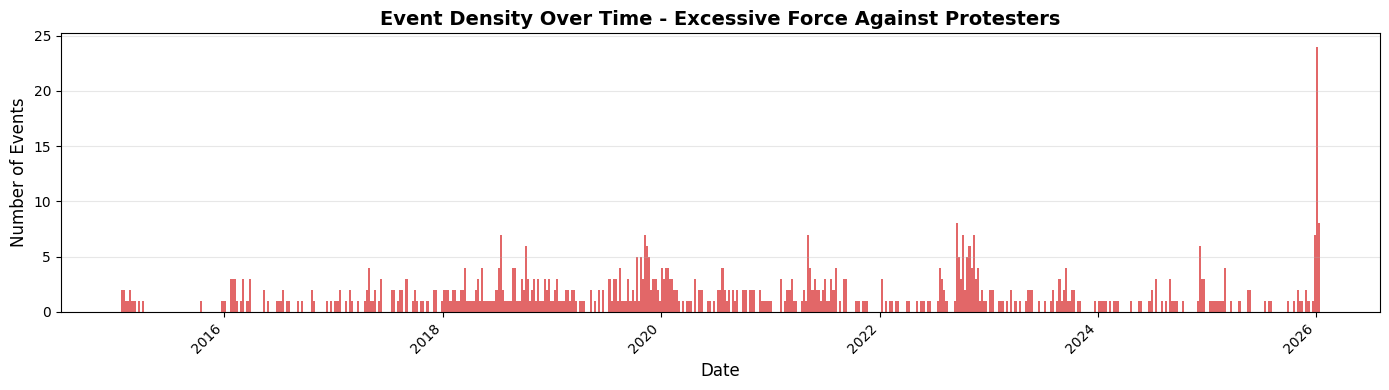

Total weeks with events: 345
Average events per week: 2.0
Max events in a week: 24


In [25]:
# Create timeline density histogram
import matplotlib.pyplot as plt

# Group by week and count events
weekly_counts = df_small.groupby('WEEK').size().reset_index(name='event_count')

# Create histogram
plt.figure(figsize=(14, 4))
plt.bar(weekly_counts['WEEK'], weekly_counts['event_count'], width=7, color='#d62728', alpha=0.7)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Events', fontsize=12)
plt.title('Event Density Over Time - Excessive Force Against Protesters', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Total weeks with events: {len(weekly_counts)}")
print(f"Average events per week: {weekly_counts['event_count'].mean():.1f}")
print(f"Max events in a week: {weekly_counts['event_count'].max()}")

In [26]:
# Mapping with Folium

m = folium.Map(
    location=[
        df_small["CENTROID_LATITUDE"].mean(),
        df_small["CENTROID_LONGITUDE"].mean()
    ],
    zoom_start=5,  # Reduced from 6 to zoom out ~20%
    titles='OpenStreetMap'
)

# Add grey ghost markers first (these stay visible as background)
for _, row in df_small.iterrows():
    folium.CircleMarker(
        location=[row["CENTROID_LATITUDE"], row["CENTROID_LONGITUDE"]],
        radius=3,
        color="grey",
        fill=True,
        fillColor="grey",
        fill_opacity=0.3
    ).add_to(m)

# Add animated layer on top
TimestampedGeoJson(
    geojson,
    period="P1W",
    duration="P4W",
    transition_time=100,
    auto_play=False,        # 🔥 critical
    loop=False,
    add_last_point=False,
    time_slider_drag_update=True  # 🔥 critical
).add_to(m)

m

In [27]:
m.save('ACLED_MENA_Map2.html')